<a href="https://colab.research.google.com/github/Injamamul-Khan/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Initial Steps

In [2]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read csv file
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project- EDA/Airbnb NYC 2019.csv')

# Exploring the data

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Handling null values in reviews per month column-
df.fillna({'reviews_per_month':0}, inplace=True)

In [8]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [9]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
# Removing columns that are not relevant
df.drop(['id','last_review'],axis=1,inplace=True)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [11]:
# Descriptive statistics
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#What can we learn about different hosts and areas?

In [12]:
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
7479,Kazuya,Manhattan,103
7478,Kazuya,Brooklyn,103
13216,Sonder,Manhattan,96
6540,Jeremy & Laura,Manhattan,96


**The host with the most listings is Sonder(NYC) who has 327 listings in Manhattan**

In [13]:
# Neighbourhood_group counts-

data = df.groupby(['neighbourhood_group'])['host_id'].count().reset_index().rename(columns = {'host_id':'count'}).sort_values(by='count', ascending = False)
data.head()

,neighbourhood_group,count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


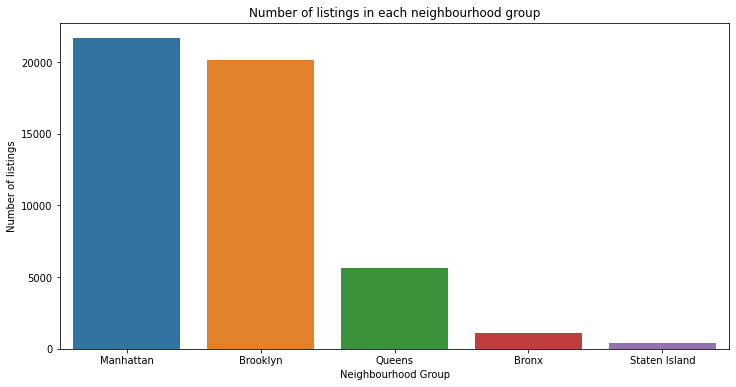

In [14]:
# Visualization
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.barplot(x = data['neighbourhood_group'], y = data['count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

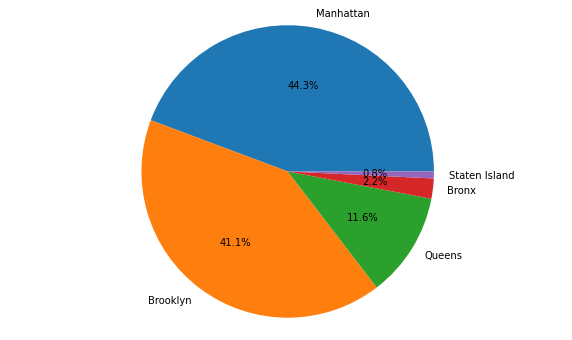

In [15]:
# Using pie chart

hosts = data['count']

neighbourhood_group = data['neighbourhood_group']


plt.figure(figsize=(10,6))
plt.pie(hosts,labels = neighbourhood_group,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Approximately 85% of the hosts are in Manhattan & Brooklyn, Staten Island has less than 1% hosts

#What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [16]:
# Finding which neighbourhood has got maximum number of reviews. 

df_neighbourhood_group_num_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().sort_values(ascending = False).to_frame(name ='Total Reviews').reset_index()
print(df_neighbourhood_group_num_reviews)

  neighbourhood_group  Total Reviews
0            Brooklyn         486574
1           Manhattan         454569
2              Queens         156950
3               Bronx          28371
4       Staten Island          11541


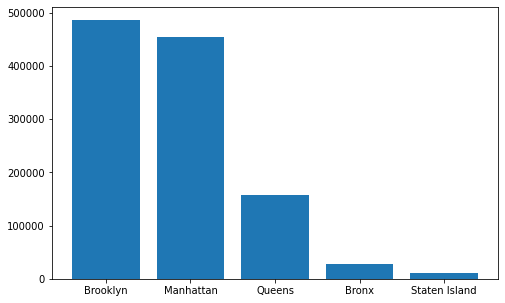

In [17]:
# Visualization
plt.rcParams['figure.figsize'] = (8, 5)
plt.bar(df_neighbourhood_group_num_reviews['neighbourhood_group'], height = df_neighbourhood_group_num_reviews['Total Reviews'],width = 0.8 )
plt.show()

Brooklyn & Manhattan are the most reviewed i.e. most popular areas whereas Staten Island & Bronx are at the least popular

In [19]:
# Finding which neighbourhood is costliest. 

df_neighbourhood_group_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False).to_frame(name ='Mean Price').reset_index()
print(df_neighbourhood_group_price,'\n\n\n')

  neighbourhood_group  Mean Price
0           Manhattan  196.875814
1            Brooklyn  124.383207
2       Staten Island  114.812332
3              Queens   99.517649
4               Bronx   87.496792 





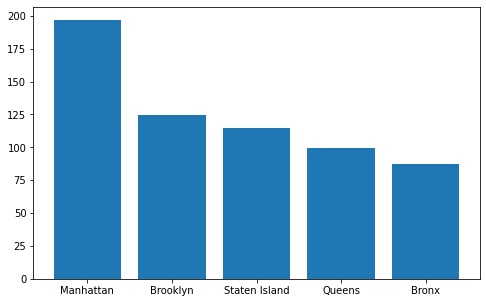

In [20]:
# Visualization

plt.bar(df_neighbourhood_group_price['neighbourhood_group'],df_neighbourhood_group_price['Mean Price'], width = 0.8)
plt.show()

Manhattan is the most expensive area
whereas Bronx is the cheapest

#Which hosts are the busiest and why?

In [21]:
# Busiest hosts would have maximum number of reviews due to frequent booking at those hosts.

busiest_hosts = df.groupby(['host_name','host_id','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
10310,Dona,47621202,Private room,Queens,629
17755,Jj,4734398,Private room,Manhattan,607
25626,Maya,37312959,Private room,Queens,543
6259,Carol,2369681,Private room,Manhattan,540
8973,Danielle,26432133,Private room,Queens,510
3966,Asa,12949460,Entire home/apt,Brooklyn,488
37830,Wanda,792159,Private room,Brooklyn,480
22556,Linda,2680820,Private room,Queens,474
8651,Dani,42273,Entire home/apt,Brooklyn,467
2953,Angela,23591164,Private room,Queens,466


In [22]:
# Busiest hosts would have maximum number of reviews due to frequent booking at those hosts.

busiest_hosts = df.groupby(['host_name','host_id','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
10310,Dona,47621202,Private room,Queens,629
17755,Jj,4734398,Private room,Manhattan,607
25626,Maya,37312959,Private room,Queens,543
6259,Carol,2369681,Private room,Manhattan,540
8973,Danielle,26432133,Private room,Queens,510
3966,Asa,12949460,Entire home/apt,Brooklyn,488
37830,Wanda,792159,Private room,Brooklyn,480
22556,Linda,2680820,Private room,Queens,474
8651,Dani,42273,Entire home/apt,Brooklyn,467
2953,Angela,23591164,Private room,Queens,466


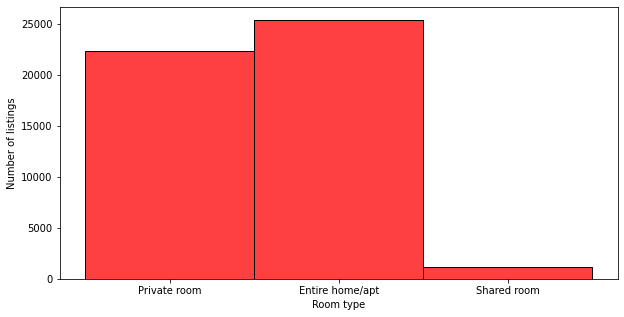

In [23]:
# Plotting histogram for room types to look for which are most preferred room types

plt.rcParams['figure.figsize'] = (10,5)
hp = sns.histplot(df['room_type'], color= 'red')
hp.set_xlabel('Room type') 
hp.set_ylabel('Number of listings')
plt.show()

#Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [24]:
# Variations in Traffic among different areas

print(df_neighbourhood_group_num_reviews)

  neighbourhood_group  Total Reviews
0            Brooklyn         486574
1           Manhattan         454569
2              Queens         156950
3               Bronx          28371
4       Staten Island          11541


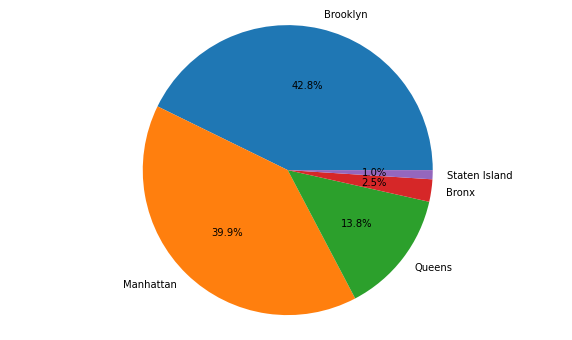

In [25]:
# Visualization

reviews = df_neighbourhood_group_num_reviews['Total Reviews']

neighbourhood_group = df_neighbourhood_group_num_reviews['neighbourhood_group']


plt.figure(figsize=(10,6))
plt.pie(reviews, labels = neighbourhood_group, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Brooklyn & Manhattan share 82%(approx) of the traffic.
Staten Is & Bronx are the least popular among the Guests

#CONCLUSION

1.   Entire home/apt is the most expensive room type and yet gets the most traffic.
2. Private rooms are the second highest in terms of booking.
3. Manhattan is the most expensive neighbourhood group, and Brooklyn gets the most traffic.
4. Sonder (NYC) is the most successful host, who only caters in Manhattan and only lists apartments and private rooms.
